In [88]:
import numpy as np
import menzalib as mz
import pylab as pl
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
from statsmodels.nonparametric.smoothers_lowess import lowess

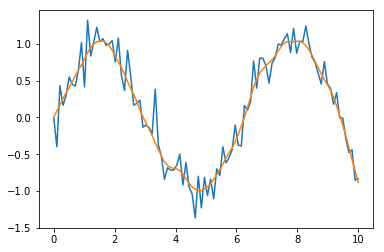

In [119]:


x = np.linspace(0,10,100)
y = np.sin(x) + np.random.normal(size=len(x))*0.2
z = np.transpose(lowess(y, x,frac=0.1))
pl.plot(x,y)
pl.plot(x,z[1])
pl.show()
pl.close()

In [85]:
def lin(x,a,b): return a*x+b

def loclin(x, vx, vy, dv=np.ones(len(x)), peso=1):
    if peso==0: return
    for i in range(len(vx)):
        dv[i]=dv[i]*np.abs((x-vx[i]))**(2/peso)
    popt,pcov=curve_fit(lin,vx,vy,sigma=dv)
    return lin(x,*popt)
    
def max_min(lista):
    massimi=([])
    minimi=([])
    for i in range(2,len(lista)):
        if lista[i-2]<lista[i-1] and lista[i]<lista[i-1]:
            massimi=np.insert(massimi,len(massimi),i-1)
        if lista[i-2]>lista[i-1] and lista[i]>lista[i-1]:
            minimi=np.insert(minimi,len(minimi),i-1)
    return np.array(massimi,dtype='int'),np.array(minimi,dtype='int')

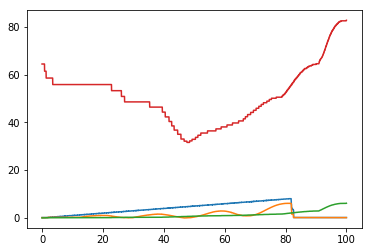

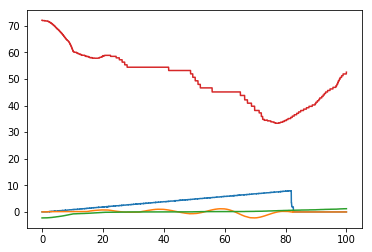

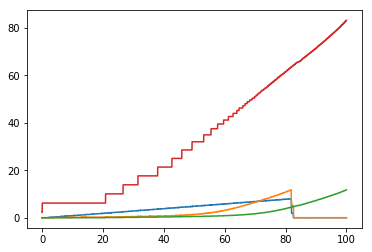

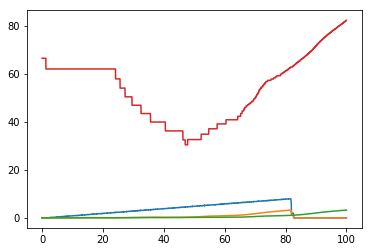

In [87]:
files=[[0,1,0],
       [2,3,2],
       [4,5,3],
       [6,7,4]]
for i in range(len(files)):
    v1=np.genfromtxt('dati/TEK000'+str(files[i][0])+'.CSV',delimiter=',',unpack='true')[4]
    v2=np.genfromtxt('dati/TEK000'+str(files[i][1])+'.CSV',delimiter=',',unpack='true')[4]
    x=np.linspace(0,100,len(v1))
    pl.plot(x,v1)
    pl.plot(x,v2)
    pl.plot(x,lowess(x,v2))
    pl.savefig('immagini/plot'+str(i)+'.eps',format='eps')
    pl.show()
    pl.close()